In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objs as go

## 2.1.2 ヒルの式

In [74]:
Kd = 2
X = np.logspace(-2, 2, 100, base=10)

n = 1

XY_Ytotal = X ** n / (Kd ** n + X ** n)
XY_Ytotal = 1 / (1 + (Kd / X) ** n)

def hill(X, n=1, Kd=2):
    return 1 / (1 + (Kd / X) ** n)

(0, 10)

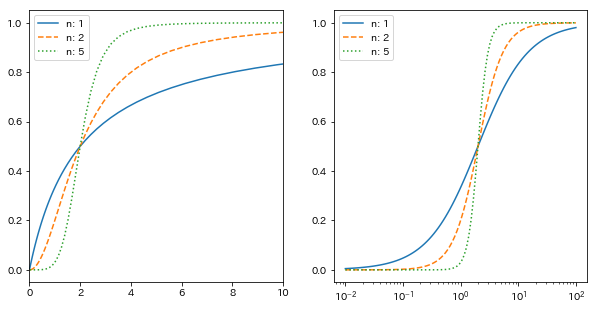

In [71]:
fig = plt.figure(figsize=(2 * 5, 1 * 5))
ax_lin = fig.add_subplot(1, 2, 1)
ax_log = fig.add_subplot(1, 2, 2)
ax_log.set_xscale('log')

linestyle_str = ['solid', 'dashed', 'dotted', 'dashdot'] 

for i, n in enumerate([1,2,5]):
    XY_Ytotal = hill(X, n)#1 / (1 + (Kd / X) ** n)
    ax_lin.plot(X, XY_Ytotal, label=f"n: {n}", linestyle=linestyle_str[i], color=sns.color_palette()[i])
    ax_log.plot(X, XY_Ytotal, label=f"n: {n}", linestyle=linestyle_str[i], color=sns.color_palette()[i])

ax_lin.legend()
ax_log.legend()
ax_lin.set_xlim(0,10)

## 2.1.3 アデアの式

In [59]:
K1 = 1/45
K2 = 1/25 
K3 = 1/250
K4 = 1/1.5

K_list = [K1, K2, K3, K4]
n = 2
#adea = sum([i * np.prod(K_list[:i], axis = 0) * X ** i for i in range(1, n + 1)]) / ((1 + sum([np.prod(K_list[:i], axis = 0) * X ** i for i in range(1, n + 1)])) * n)

def adea(X, n):
    numerator = sum([i * np.prod(K_list[:i], axis = 0) * X ** i for i in range(1, n + 1)])
    denominator = (1 + sum([np.prod(K_list[:i], axis = 0) * X ** i for i in range(1, n + 1)])) * n
    return numerator / denominator




(0, 100)

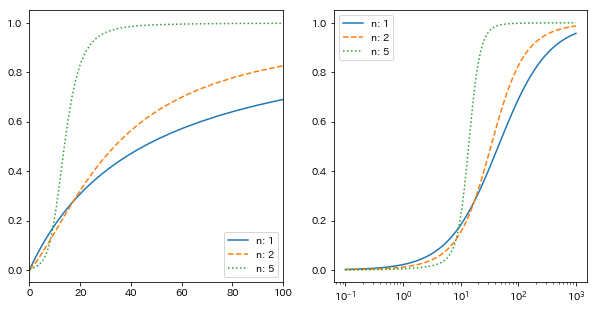

In [63]:
X = np.logspace(-1, 3, 100, base=10)

fig = plt.figure(figsize=(2 * 5, 1 * 5))
ax_lin = fig.add_subplot(1, 2, 1)
ax_log = fig.add_subplot(1, 2, 2)
ax_log.set_xscale('log')

linestyle_str = ['solid', 'dashed', 'dotted', 'dashdot'] 

for i, n in enumerate([1,2,5]):
    occupancy = adea(X, n)
    ax_lin.plot(X, occupancy, label=f"n: {n}", linestyle=linestyle_str[i], color=sns.color_palette()[i])
    ax_log.plot(X, occupancy, label=f"n: {n}", linestyle=linestyle_str[i], color=sns.color_palette()[i])

ax_lin.legend()
ax_log.legend()
ax_lin.set_xlim(0,100)

## 2.1.4 MWCモデル


In [82]:
L_0 = 1200
c = 0.03

def MWC(x, n=4, L_0=1200, c=0.03):
    numerator = x * (1 + x) ** (n - 1) + L_0 * c * x * (1 + c * x) ** (n - 1)
    denominator =(1 + x) ** n + L_0 * (1 + c * x) ** n
    return numerator / denominator



/Users/koji11235/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(0.0707945784384138, 100)

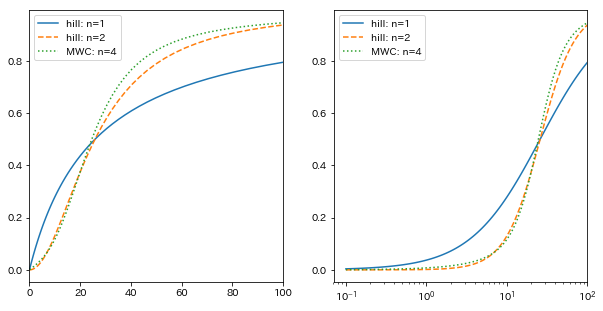

In [95]:
K_R = 0.24
O2 = np.logspace(-1, 2, 100, base=10)
X = np.logspace(-1, 2, 100, base=10)

fig = plt.figure(figsize=(2 * 5, 1 * 5))
ax_lin = fig.add_subplot(1, 2, 1)
ax_log = fig.add_subplot(1, 2, 2)
ax_log.set_xscale('log')

linestyle_str = ['solid', 'dashed', 'dotted', 'dashdot'] 

Y_mwc = MWC(K_R * O2, n=4, L_0=1200, c=0.03)
Y_hill_n1 = hill(X, n=1, Kd=25.85)
Y_hill_n2 = hill(X, n=2, Kd=25.85)
ax_lin.plot(X, Y_hill_n1, label="hill: n=1", linestyle=linestyle_str[0], color=sns.color_palette()[0])
ax_lin.plot(X, Y_hill_n2, label="hill: n=2", linestyle=linestyle_str[1], color=sns.color_palette()[1])
ax_lin.plot(O2, Y_mwc, label=f"MWC: n=4", linestyle=linestyle_str[2], color=sns.color_palette()[2])

ax_log.plot(X, Y_hill_n1, label="hill: n=1", linestyle=linestyle_str[0], color=sns.color_palette()[0])
ax_log.plot(X, Y_hill_n2, label="hill: n=2", linestyle=linestyle_str[1], color=sns.color_palette()[1])
ax_log.plot(O2, Y_mwc, label=f"MWC: n=4", linestyle=linestyle_str[2], color=sns.color_palette()[2])

ax_lin.legend()
ax_log.legend()
ax_lin.set_xlim(0,100)
ax_log.set_xlim(0,100)

## 例題 2.4

### 競合阻害

In [124]:
K_M = 0.1
K_I = 1
V_max = 10

X = np.logspace(-1, 2, 100, base=10)
I = np.logspace(-1, 2, 100, base=10)
X, I = np.meshgrid(X, I)


dX_ast = V_max * X / (K_M * (1 + I / K_I) + X)

Text(0.5, 0.92, 'Surface Plot')

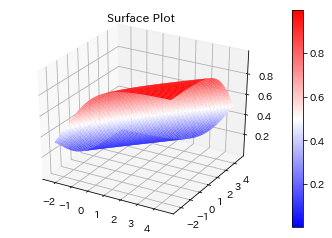

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(np.log(X), np.log(I), dX_ast, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")


In [125]:
data = [
    go.Surface(
        x = np.log(X),
        y = np.log(I),
        z = dX_ast,
    )
]

layout = go.Layout(
    title='competitive inhibition',
    scene={
        'xaxis': {'title': 'log[X]'},
        'yaxis': {'title': 'log[I]'},
        'zaxis': {'title': 'dX*/dt'}
    },
    font={'size': 14}
)

fig = go.Figure(data=data, layout=layout)
fig.write_html("images/Chapter2/competitive_inhibition.html")
plotly.offline.plot(fig)

'temp-plot.html'

### 非競合阻害

In [120]:
K_M = 0.1
K_I = 0.1
V_max = 10

X = np.logspace(-1, 2, 100, base=10)
I = np.logspace(-1, 2, 100, base=10)
X, I = np.meshgrid(X, I)


dX_ast = V_max * X / (K_M  + X) * K_I / (K_I + I)

In [122]:
data = [
    go.Surface(
        x = np.log(X),
        y = np.log(I),
        z = dX_ast,
    )
]

layout = go.Layout(
    title='non-competitive inhibition',
    scene={
        'xaxis': {'title': 'log[X]'},
        'yaxis': {'title': 'log[I]'},
        'zaxis': {'title': 'dX*/dt'}
    },
    font={'size': 14}
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig)
fig.write_html("images/Chapter2/non-competitive_inhibition.html")
